# Packages Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score, 
                                     learning_curve, 
                                     GridSearchCV, 
                                     RandomizedSearchCV)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (FunctionTransformer,  
                                   StandardScaler, 
                                   MinMaxScaler, 
                                   OneHotEncoder)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, 
                             f1_score, 
                             recall_score, 
                             precision_score, 
                             make_scorer,
                            roc_curve,
                            roc_auc_score,
                            RocCurveDisplay)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from time import time

# 1. Data Exploration

In [2]:
df = pd.read_csv('credit_train.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,no checking,30,critical/other existing credit,radio/tv,4530,<100,4<=X<7,4,female div/dep/mar,none,...,car,26,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
1,0<=X<200,30,delayed previously,business,2503,100<=X<500,>=7,4,male single,none,...,life insurance,41,stores,own,2,skilled,1,none,yes,good
2,0<=X<200,12,existing paid,radio/tv,1567,<100,1<=X<4,1,female div/dep/mar,none,...,car,22,none,own,1,skilled,1,yes,yes,good
3,0<=X<200,21,existing paid,furniture/equipment,3976,no known savings,4<=X<7,2,male single,none,...,car,35,none,own,1,skilled,1,yes,yes,good
4,no checking,9,existing paid,furniture/equipment,2301,100<=X<500,<1,2,female div/dep/mar,none,...,life insurance,22,none,rent,1,skilled,1,none,yes,good


## 1.1 Data Description
We can see that train dataset has 20 features and 1 target. According to the information chart below: it has no missing value. <br/>
Inside, there are 13 categorical features and 7 numerical features.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         800 non-null    object
 1   duration                800 non-null    int64 
 2   credit_history          800 non-null    object
 3   purpose                 800 non-null    object
 4   credit_amount           800 non-null    int64 
 5   savings_status          800 non-null    object
 6   employment              800 non-null    object
 7   installment_commitment  800 non-null    int64 
 8   personal_status         800 non-null    object
 9   other_parties           800 non-null    object
 10  residence_since         800 non-null    int64 
 11  property_magnitude      800 non-null    object
 12  age                     800 non-null    int64 
 13  other_payment_plans     800 non-null    object
 14  housing                 800 non-null    object
 15  existi

## 1.2 Missing Value & duplicate check

In [4]:
# Missing value
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [5]:
#Duplicates
df.duplicated().sum()

0

As we can see, this dataset has no missing value and no duplicate.

## 1.3 Outliers

In [6]:
#Numerical features
#z-score calculation
num_col = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', "num_dependents"]
#Mean and std values
num_mean = df[num_col].mean()
num_std = df[num_col].std()
#z-score
z_score = abs(df[num_col] - num_mean) / num_std
print(z_score)

     duration  credit_amount  installment_commitment  residence_since  \
0    0.754677       0.485080                0.904702         1.043712   
1    0.754677       0.246424                0.904702         0.757732   
2    0.726291       0.584208                1.795900         1.658455   
3    0.014193       0.285153                0.895700         0.142990   
4    0.973119       0.319322                0.895700         1.043712   
..        ...            ...                     ...              ...   
795  0.261021       0.249786                0.904702         0.757732   
796  0.261021       0.451404                0.904702         1.043712   
797  0.890843       0.827080                0.904702         0.142990   
798  0.561739       0.284070                1.795900         1.043712   
799  1.219947       0.703659                0.895700         1.043712   

          age  existing_credits  num_dependents  
0    0.824963          0.719402        0.442233  
1    0.493396          

In [7]:
#z_score > 3
print('Number of upper outliers:\n{0}'.format((z_score>3).sum()))
print('Number of lower outliers:\n{0}'.format((z_score<-3).sum()))
#z_score > 4
print('Number of upper outliers:\n{0}'.format((z_score>4).sum()))
print('Number of lower outliers:\n{0}'.format((z_score<-4).sum()))

Number of upper outliers:
duration                  12
credit_amount             17
installment_commitment     0
residence_since            0
age                        5
existing_credits           4
num_dependents             0
dtype: int64
Number of lower outliers:
duration                  0
credit_amount             0
installment_commitment    0
residence_since           0
age                       0
existing_credits          0
num_dependents            0
dtype: int64
Number of upper outliers:
duration                  1
credit_amount             7
installment_commitment    0
residence_since           0
age                       0
existing_credits          4
num_dependents            0
dtype: int64
Number of lower outliers:
duration                  0
credit_amount             0
installment_commitment    0
residence_since           0
age                       0
existing_credits          0
num_dependents            0
dtype: int64


In [8]:
#Categorical features
cat_col = df.drop('class', axis=1).select_dtypes(exclude=['int64']).columns
for col in cat_col:
    print('The vc of column {0}:\n{1}\n'.format(col, df[col].value_counts()))

The vc of column checking_status:
no checking    323
<0             225
0<=X<200       201
>=200           51
Name: checking_status, dtype: int64

The vc of column credit_history:
existing paid                     425
critical/other existing credit    246
delayed previously                 63
no credits/all paid                34
all paid                           32
Name: credit_history, dtype: int64

The vc of column purpose:
radio/tv               225
new car                185
furniture/equipment    150
used car                82
business                78
education               37
repairs                 20
domestic appliance       8
other                    8
retraining               7
Name: purpose, dtype: int64

The vc of column savings_status:
<100                480
no known savings    149
100<=X<500           87
500<=X<1000          48
>=1000               36
Name: savings_status, dtype: int64

The vc of column employment:
1<=X<4        265
>=7           208
4<=X<7        1

For categorical features, we can merge the "no credits/all paid" value with "all paid" value to column <b>credit_history</b>; <br/>
Then for column <b>purpose</b>, there are outliers "domestic appliance" and "retraining", we can both merge them to "other".

## 1.4 Label analysis
The ratio of each value for label column is well-distributed. (70% - 30%)

/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


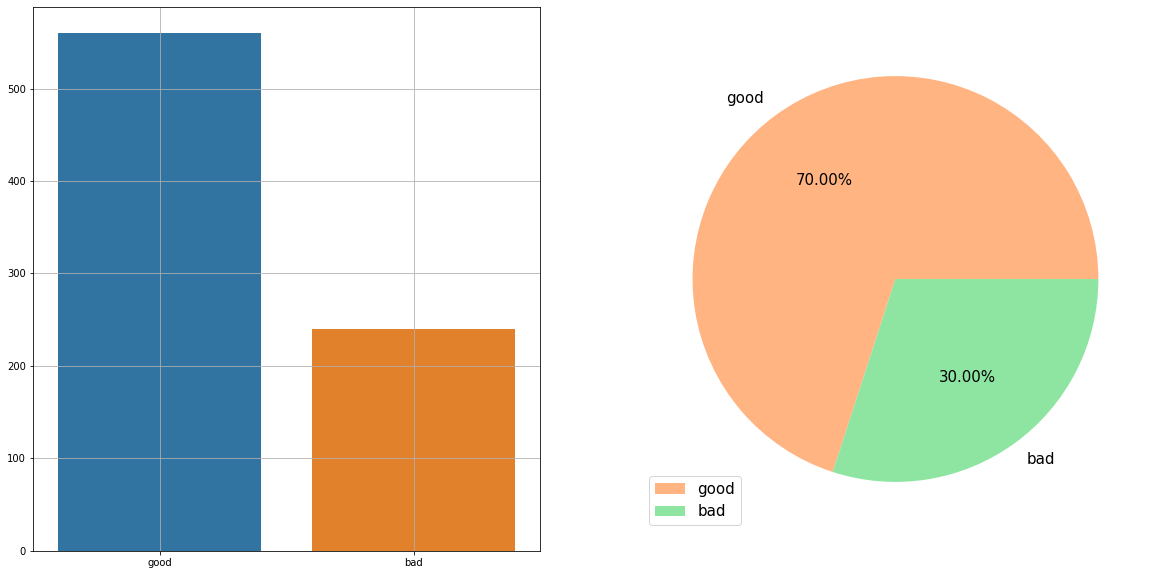

In [9]:
#Label analyse
#Bar plot and box plot.
figs, axs = plt.subplots(1,2, figsize=(20,10))
vc_class = df['class'].value_counts()
sns.barplot(vc_class.index, vc_class.values,ax = axs[0])
axs[0].grid('on')
colors = sns.color_palette('pastel')[1:3]
plt.pie(vc_class.values, labels=vc_class.index, colors=colors, autopct='%.2f%%', textprops={'fontsize':15})
plt.legend(fontsize=15)
plt.show()

## 1.5 Features analysis one by one

### 1.5.1 Numerical features
For numerical features, columns: <b>duration</b>, <b>credit_amount</b> and <b>age</b> have outliers while the other numerical features do not have outlier.

/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

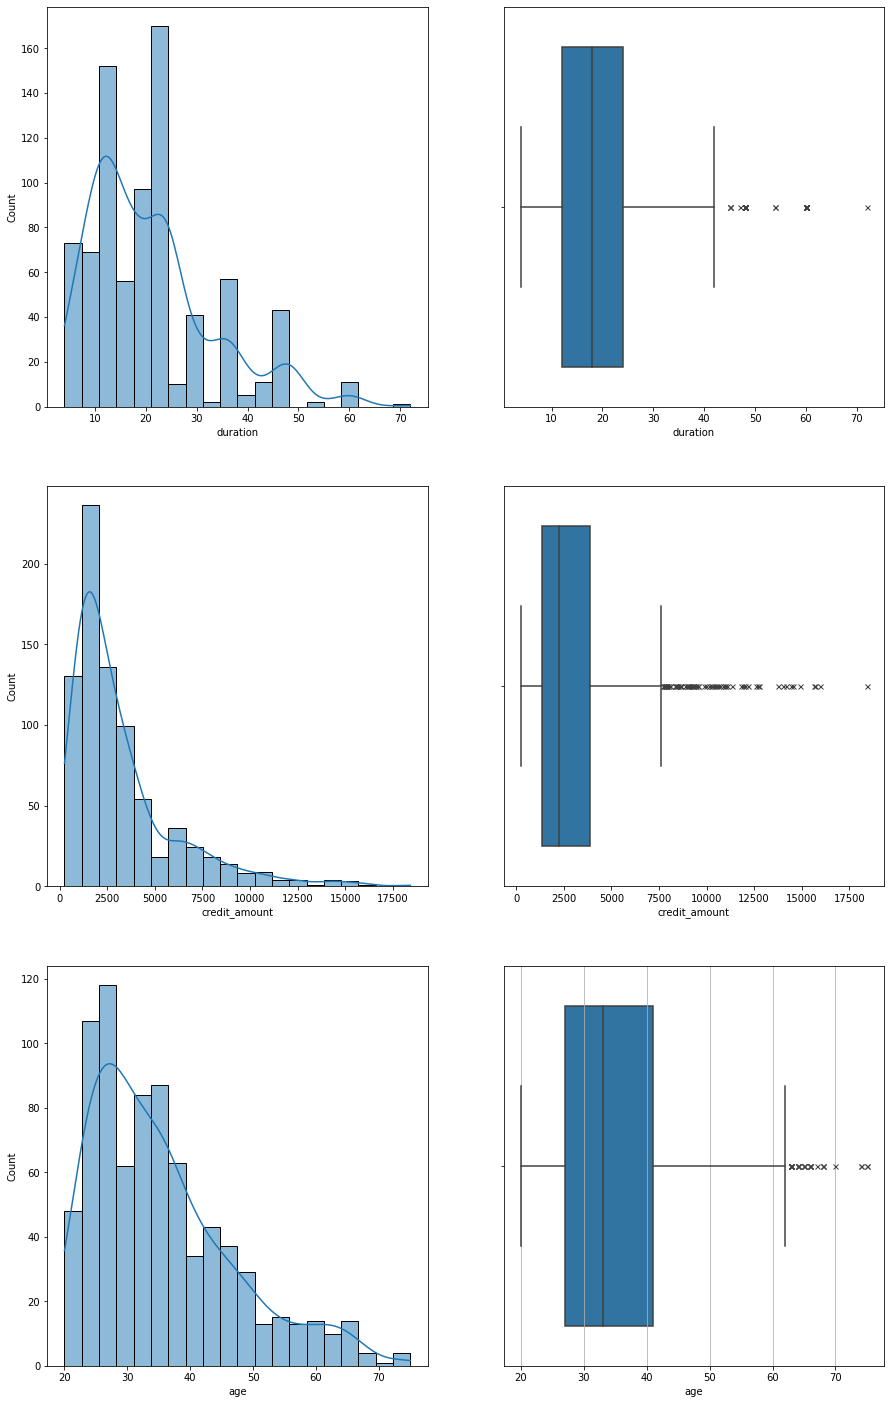

In [10]:
#Numerical features
#Draw histgram and boxplot to each numerical feature
figs, axs = plt.subplots(3, 2, figsize=(15,25))
# print(num_col)
num_col1 = [num_col[0], num_col[1], num_col[4]]
num_col2 = [num_col[2], num_col[3], num_col[5], num_col[6]]
# print(num_col2)
for col, ax in zip(num_col1, axs):
    sns.histplot(df[col],
                bins=20,
                kde=True,
                ax=ax[0])
    plt.grid('on')
    sns.boxplot(df[col], 
               flierprops={'marker':'x'},
               ax=ax[1])

/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

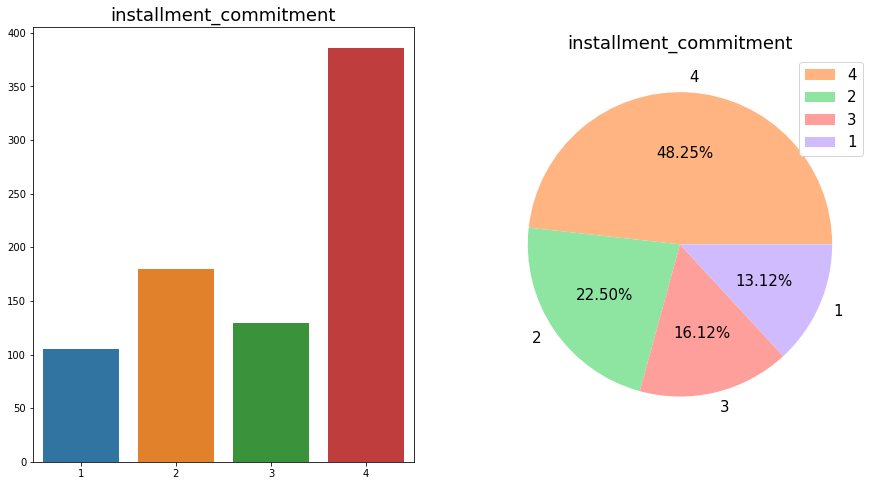

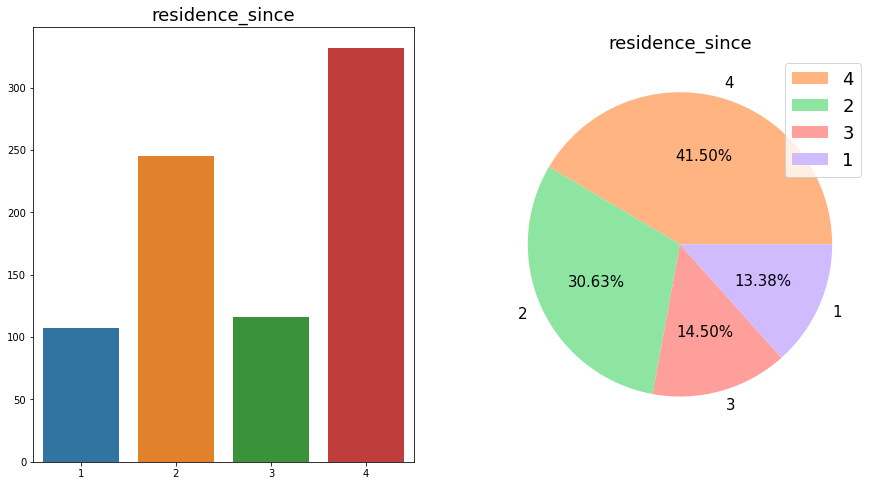

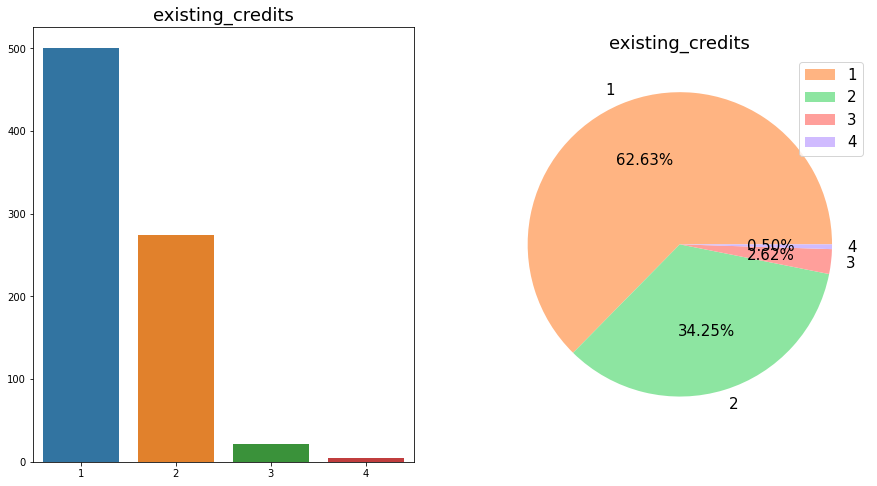

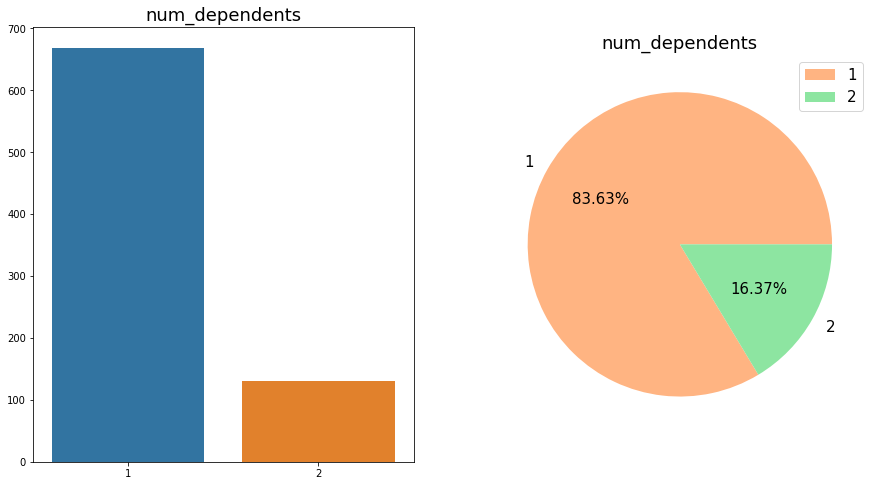

In [11]:
figs, axs = plt.subplots(1, 2, figsize=(15,8))
vc_num = df[num_col2[0]].value_counts()
sns.barplot(vc_num.index, 
            vc_num.values,
            ax=axs[0])
axs[0].set_title(num_col2[0],fontsize=18)
plt.grid('on')
colors = sns.color_palette('pastel')[1:5]
plt.pie(vc_num.values, 
    labels=vc_num.index, 
    colors=colors, 
    autopct='%.2f%%', 
    textprops={'fontsize':15})
plt.title(num_col2[0], fontsize=18)
plt.legend(fontsize=15)


figs, axs = plt.subplots(1, 2, figsize=(15,8))
vc_num = df[num_col2[1]].value_counts()
sns.barplot(vc_num.index, 
            vc_num.values,
            ax=axs[0])
axs[0].set_title(num_col2[1],fontsize=18)
plt.grid('on')
colors = sns.color_palette('pastel')[1:5]
plt.pie(vc_num.values, 
    labels=vc_num.index, 
    colors=colors, 
    autopct='%.2f%%', 
    textprops={'fontsize':15})
plt.title(num_col2[1], fontsize=18)
plt.legend(fontsize=18)

figs, axs = plt.subplots(1, 2, figsize=(15,8))
vc_num = df[num_col2[2]].value_counts()
sns.barplot(vc_num.index, 
            vc_num.values,
            ax=axs[0])
axs[0].set_title(num_col2[2],fontsize=18)
plt.grid('on')
colors = sns.color_palette('pastel')[1:5]
plt.pie(vc_num.values, 
    labels=vc_num.index, 
    colors=colors, 
    autopct='%.2f%%', 
    textprops={'fontsize':15})
plt.title(num_col2[2], fontsize=18)
plt.legend(fontsize=15)

figs, axs = plt.subplots(1, 2, figsize=(15,8))
vc_num = df[num_col2[3]].value_counts()
sns.barplot(vc_num.index, 
            vc_num.values,
            ax=axs[0])
axs[0].set_title(num_col2[3],fontsize=18)
plt.grid('on')
colors = sns.color_palette('pastel')[1:5]
plt.pie(vc_num.values, 
    labels=vc_num.index, 
    colors=colors, 
    autopct='%.2f%%', 
    textprops={'fontsize':15},
       )
plt.title(num_col2[3], fontsize=18)
plt.legend(fontsize=15)

### 1.5.2 Categorical features

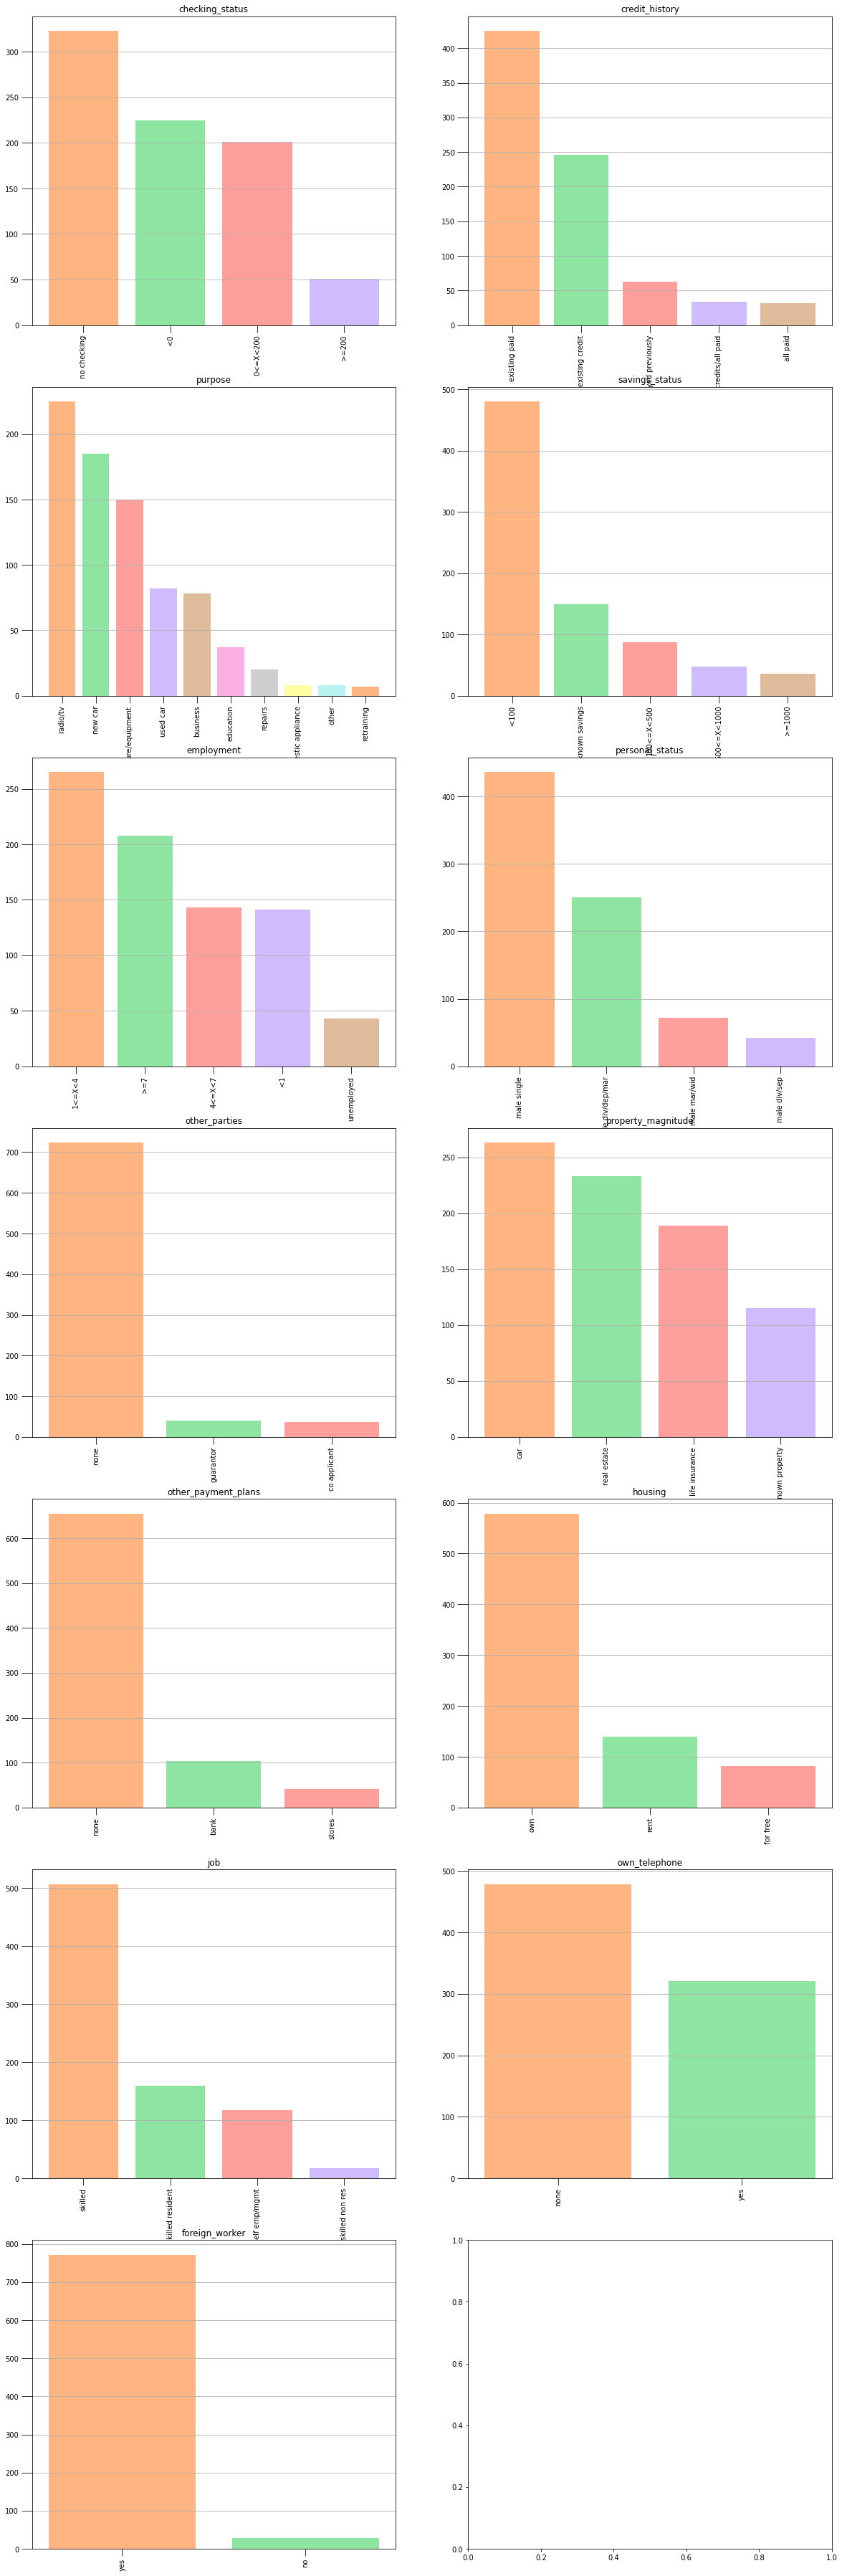

In [12]:
figs, axs = plt.subplots(7,2, figsize=(20, 65))
for col, ax in zip(cat_col, np.ravel(axs)):
    vc_cat = df[col].value_counts()
    colors = sns.color_palette('pastel')[1:11]
    ax.bar(vc_cat.index, vc_cat.values, color=colors)
    ax.tick_params(axis='x', rotation=90, size=10)
    ax.tick_params(axis='y', size=15)
    ax.grid('on', axis='y')
    ax.set_title(col, fontsize=12)

## 1.6 Correlation between features

### 1.6.1 Numerical features

In [13]:
# Correlation calculation
corr = df.iloc[:, :-1].corr()
corr

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.634269,0.075948,0.012066,-0.035900,0.003718,-0.029590
credit_amount,0.634269,1.000000,-0.258370,-0.006943,0.009456,0.018666,0.015997
installment_commitment,0.075948,-0.258370,1.000000,0.077496,0.059171,0.019057,-0.104502
residence_since,0.012066,-0.006943,0.077496,1.000000,0.281195,0.059479,0.045047
age,-0.035900,0.009456,0.059171,0.281195,1.000000,0.146942,0.112116
existing_credits,0.003718,0.018666,0.019057,0.059479,0.146942,1.000000,0.120335
num_dependents,-0.029590,0.015997,-0.104502,0.045047,0.112116,0.120335,1.000000


We can see from the heatmap, duration and credit_amount have a great correlation while between the other features they do not have.

/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_45341/2878450387.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 1.0, 'Heatmap of all the features')

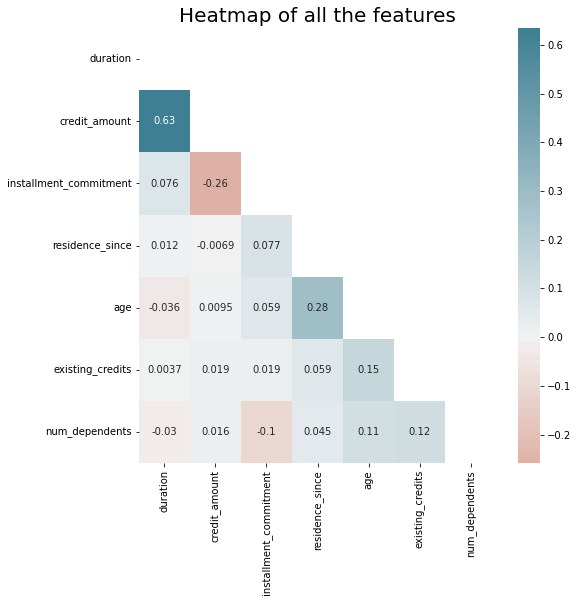

In [14]:
#Heatmap
plt.subplots(figsize=(8, 8))

#Heatmap
#Give mask to the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Draw figures
sns.heatmap(corr,
           cmap=sns.diverging_palette(20, 220, n=200),
           mask=mask,
            annot=True,
            center=0
           )

plt.title("Heatmap of all the features", fontsize=20)

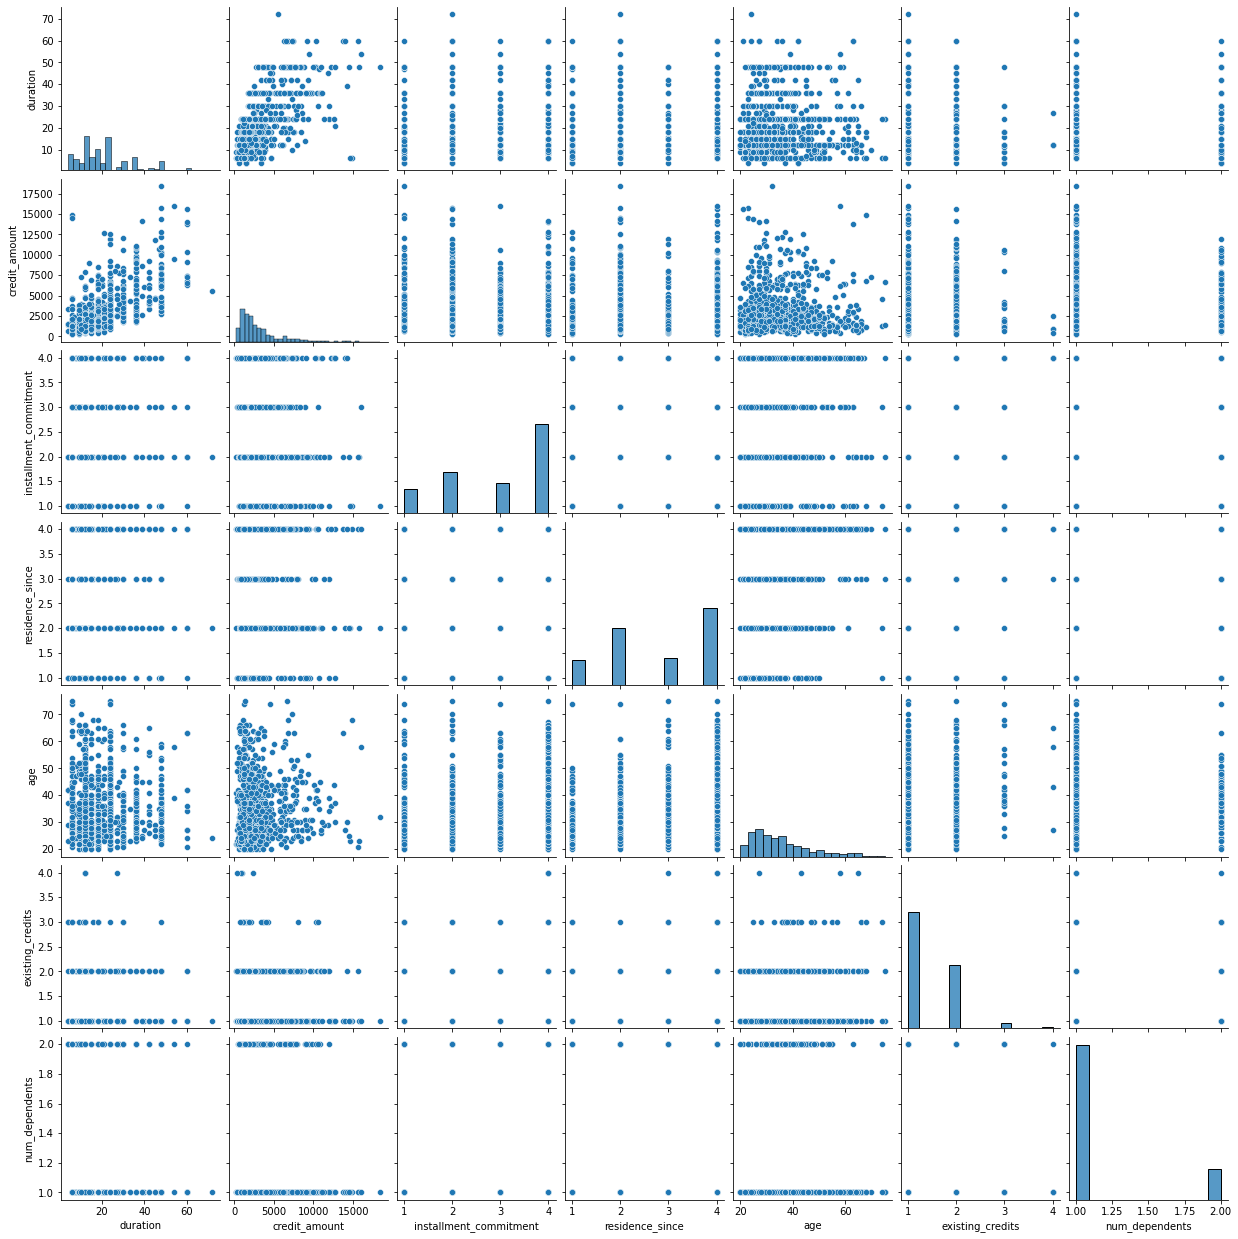

In [15]:
#Pairplots
sns.pairplot(df[num_col])
plt.show()

### 1.6.2 Categorical features - not done

In [16]:
df['duration']

0      30
1      30
2      12
3      21
4       9
       ..
795    24
796    24
797    10
798    14
799     6
Name: duration, Length: 800, dtype: int64

In [17]:
#Correlation between employment and purpose
df[['job', 'purpose']]

,job,purpose
0,high qualif/self emp/mgmt,radio/tv
1,skilled,business
2,skilled,radio/tv
3,skilled,furniture/equipment
4,skilled,furniture/equipment
...,...,...
795,skilled,new car
796,skilled,business
797,skilled,retraining
798,skilled,new car


## 1.7 Correlation between features and label

In [18]:
#Tansfer categorical label to numerical label
# Good -> 1; bad -> 0
df_temp = df.copy()
df_temp['class'] = df_temp['class'].replace({
    'good': 1,
    'bad': 0
})

In [19]:
#Correlation between 
df_temp.corr()['class'][:-1].sort_values()

duration                 -0.204895
credit_amount            -0.138192
installment_commitment   -0.074202
residence_since          -0.000246
num_dependents            0.031696
existing_credits          0.059386
age                       0.115076
Name: class, dtype: float64

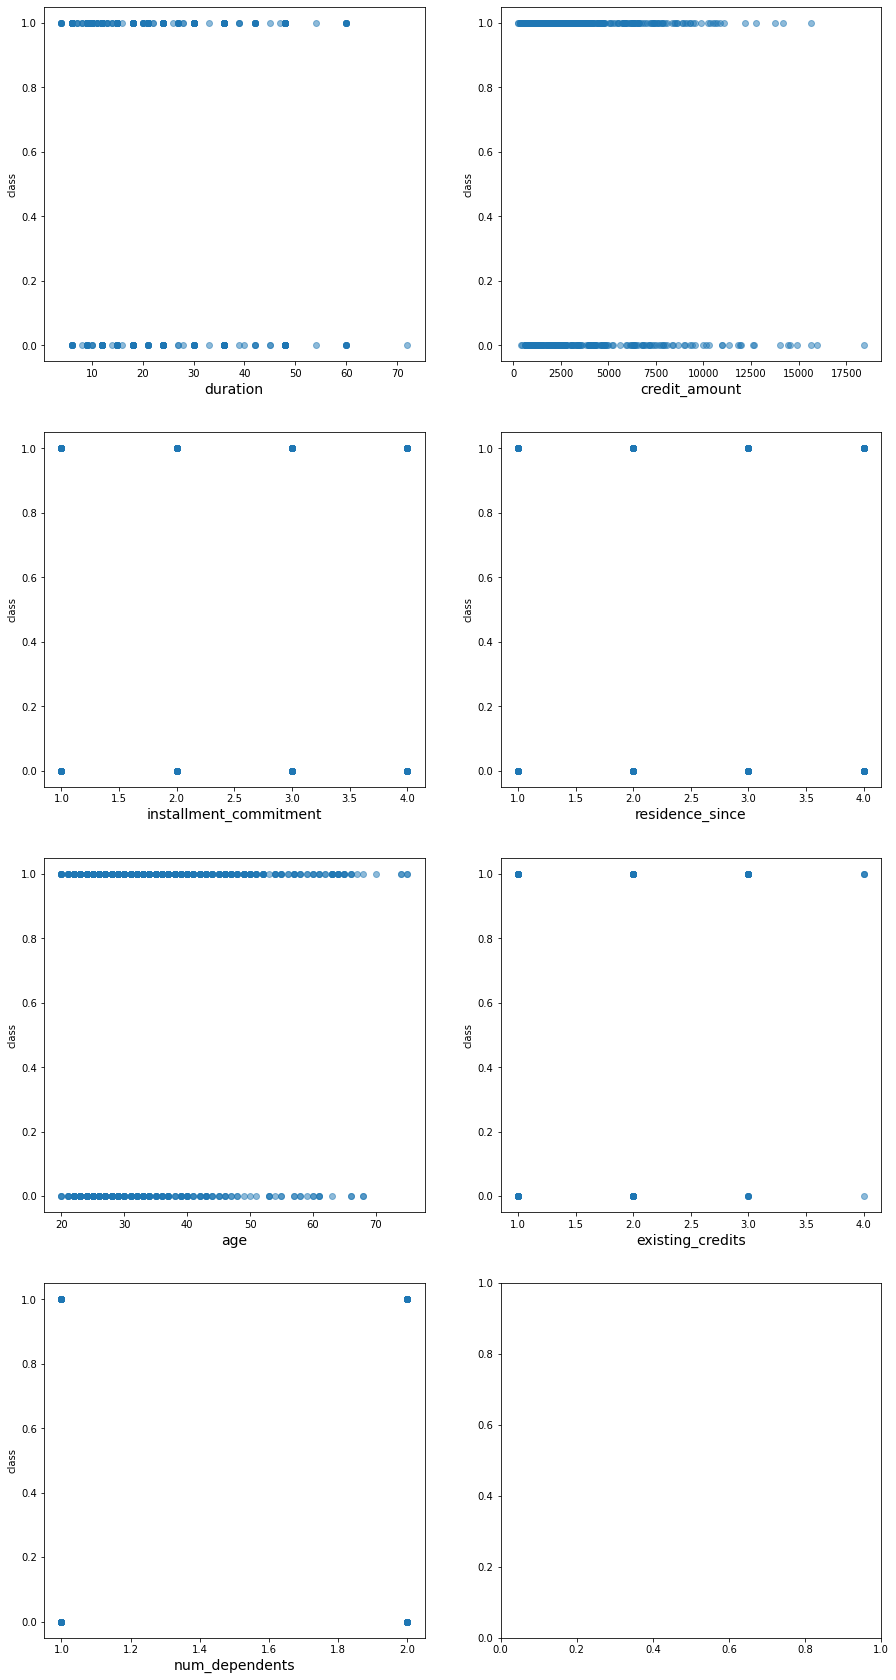

In [20]:
# Numerical features and label correlation graphs
figs, axs = plt.subplots(4,2,figsize=(15,30))
for ax, col in zip(np.ravel(axs), num_col):
    ax.scatter(df_temp[col], df_temp['class'], alpha=0.5)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('class')

plt.show()

So we can not find any clear correlation between features and label.

# 2. Data Preprocessing

In [21]:
#Data splitting
X = df.copy().iloc[:, :-1]
y = df.copy().iloc[:, -1]

In [22]:
#Split data into training and testing sets.
#Train - 80%
#Test - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    train_size=0.8, 
                                                    random_state=42)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

good    0.7
bad     0.3
Name: class, dtype: float64
good    0.7
bad     0.3
Name: class, dtype: float64


Use a <b>Pipeline</b> and <b>ColumnTransformer</b> to handle missing value (No missing value in this case) and outliers.

Also, doing scaling to all features including numerical and categorical values.


In [23]:
# Function to deal with outliers
# We do merge method to categorical features and higher/lower cutoff value replacement to numerical features.   
#Numerical features
class OutlierImputerNum(BaseEstimator, TransformerMixin):
    def __init__(self, threshold, strategy):
        self.threshold = threshold
        self.strategy = strategy
        if self.strategy <= 0.5 or self.strategy >= 1 : raise(Exception("strategy should be ]0.5, 1[."))
    def fit(self, X, y=None):
        self.mean = X.mean()
        self.std = X.std()
        return self
    def transform(self, X, y=None):
        X = pd.DataFrame(X)
        X_zscore = (X - self.mean) / self.std
        X = X.mask(X_zscore > self.threshold, X.quantile(q=self.strategy), axis=1)
        X = X.mask(X_zscore < -self.threshold, X.quantile(q=1-self.strategy), axis=1)
        return X
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

outimp = OutlierImputerNum(threshold = 3.5, 
                        strategy = 0.75)

X_train_num = outimp.fit_transform(X_train)
X_test_num = outimp.transform(X_test)



/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_45341/2993482938.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  self.mean = X.mean()
/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_45341/2993482938.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  self.std = X.std()
/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_45341/2993482938.py:16: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  X = X.mask(X_zscore > self.threshold, X.quantile(q=self.strategy), axis=1)


In [24]:
## Categocial features, do merging to some specific value of the column.
def cat_imputer(df):
    
    df['purpose'] = df['purpose'].replace({'domestic appliance':'other', 'retraining': 'other'})
    df['credit_history'] = df['credit_history'].replace({'all paid': 'no credits/all paid'})
    return df

In [25]:
#Combine all the procedures into Pipeline and ColumnTransformer
#We use outlier_imputer_cat for imputing the outliers of categorical values and OneHotEncoder for encode them.
cat_transformer = Pipeline([('out', FunctionTransformer(cat_imputer)),
                            ('ohe', OneHotEncoder())])

ct = ColumnTransformer([('num', StandardScaler(), num_col),
                        ('cat', cat_transformer, cat_col)],
                       sparse_threshold=0)                    # Outputs a numpy array all the time

In [26]:
# Preprocessing fit and transform on train set and do transfomation on test set.
X_train_use = ct.fit_transform(X_train)
X_test_use = ct.transform(X_test)


# Convert into dataframe
col_names = np.concatenate([num_col, ct.named_transformers_.cat.named_steps.ohe.get_feature_names_out()], axis=0)

X_train_use = pd.DataFrame(X_train_use, columns=col_names)
X_test_use = pd.DataFrame(X_test_use, columns=col_names)

# 3. Model Selection

We can find out that this is a binary classification problem, so it is a perfect example for using <b>Logistic Regression</b> to deal with the prediction.

In [27]:
# Select right models
f1_scorer = make_scorer(f1_score, average='micro')

## 3.1 Logistic Regression

### 3.1.1 Basic Logistic Regression building and testing

#### 3.1.1 - 1 LR model establishing

In [28]:
#First we build the LG model with only the iteration and random params.
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_use, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [29]:
# Check the importance of each feature.
print("Coefficient of each feature:\n{0}".format(clf.coef_))
print("Bias:\n{0}".format(clf.intercept_))

Coefficient of each feature:
[[-0.30307411 -0.42247329 -0.42385699  0.04467021  0.24116902 -0.04112234
  -0.08502731 -0.2740667  -0.66067876  0.06560957  0.87116462  0.8712812
  -0.29443355 -0.01496033 -0.55985859  0.34854756 -0.78368137  0.26785305
  -0.63610129 -0.14224239  0.3134795  -0.51594051  1.1501142  -0.22897787
  -0.16636386 -0.57487233  0.53088045  0.44136235 -0.02683898  0.33810748
  -0.03085835 -0.13928848 -0.13909292 -0.1505151  -0.46924058  0.07958334
   0.54220107 -0.60816242  1.00278587 -0.39259472  0.224712   -0.05195262
  -0.58685808  0.41612744 -0.3693428   0.60667445 -0.23530292  0.23502749
   0.03976176 -0.27276051  0.25899021  0.03817613 -0.34563995  0.05050234
  -0.22992639  0.23195513  0.54096082 -0.53893208]]
Bias:
[1.25927551]


It seems that the capital.loss and especially the capital.gain features have a major effect on the label when they are different than 0; <br/>
--> it might be interesting to create new features based on them; <br/>
Education and especially < 11th, Prof School and Doctorate also seems to have a significant effect on the label.


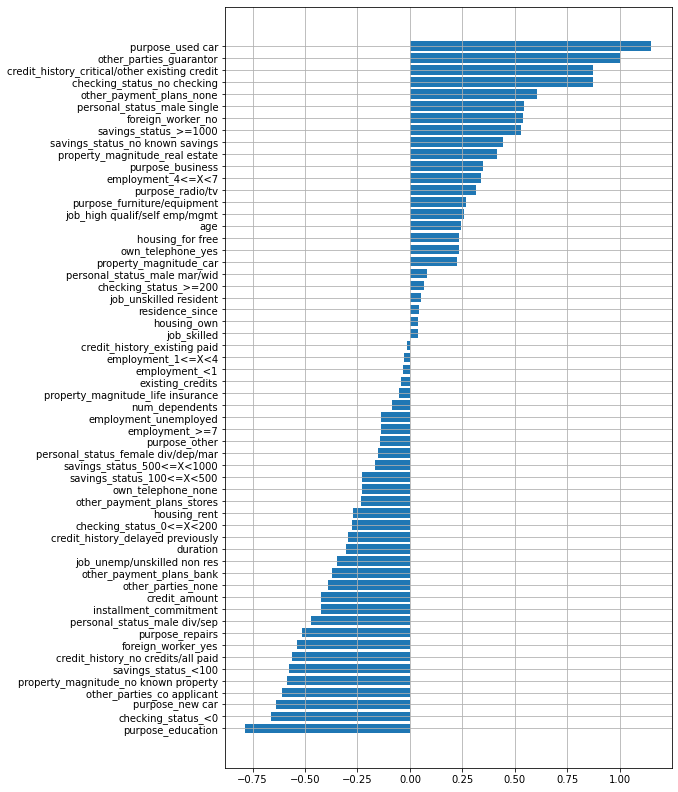

In [30]:
plt.figure(figsize=(8,14))
idx = np.argsort(clf.coef_[0])
plt.barh(X_train_use.columns[idx], clf.coef_[0,idx])
plt.grid('on')
plt.show()

#### 3.1.1 - 2 LR model evaluation

In [31]:
#Test the fitting score on the training set (performance of the model).
print('Accuracy on the training set of orignal logistic regression model:{0}%'
      .format(round(clf.score(X_train_use, y_train) * 100, 2)))

Accuracy on the training set of orignal logistic regression model:78.91%


In [32]:
y_pred_proba = clf.predict_proba(X_train_use)

In [33]:
y_pred_proba[:10]

array([[0.67950947, 0.32049053],
       [0.06576804, 0.93423196],
       [0.06826438, 0.93173562],
       [0.65371018, 0.34628982],
       [0.62532707, 0.37467293],
       [0.12916792, 0.87083208],
       [0.17292044, 0.82707956],
       [0.16345309, 0.83654691],
       [0.00846258, 0.99153742],
       [0.28694337, 0.71305663]])

#### 3.1.1 - 3 LR model prediction and measuring.

In [34]:
# Do predict by using this model using the features in training set.
y_pred = clf.predict(X_train_use)

In [35]:
# Metrics to measure if the model works well on the training set.
print('Accuracy score of the model works on training set:{0}%'.format(round(accuracy_score(y_train, y_pred) * 100, 2)), end='\n\n')

#Let positive as 'good':
print('Positive class is "good".')
print('Presision of the model works on training set:{0}%'.format(round(precision_score(y_train, y_pred, pos_label='good') * 100, 2)))
print('Recall of the model works on training set:{0}%'.format(round(recall_score(y_train, y_pred, pos_label='good') * 100, 2)))
print('f1-score of the model works on training set:{0}%'.format(round(f1_score(y_train, y_pred, pos_label='good') * 100, 2)), end='\n\n')

#Let positive as 'bad'
print('Positive class is "bad".')
print('Presision of the model works on training set:{0}%'.format(round(precision_score(y_train, y_pred, pos_label='bad') * 100, 2)))
print('Recall of the model works on training set:{0}%'.format(round(recall_score(y_train, y_pred, pos_label='bad') * 100, 2)))
print('f1-score of the model works on training set:{0}%'.format(round(f1_score(y_train, y_pred, pos_label='bad') * 100, 2)), end='\n')

Accuracy score of the model works on training set:78.91%

Positive class is "good".
Presision of the model works on training set:82.14%
Recall of the model works on training set:89.29%
f1-score of the model works on training set:85.56%

Positive class is "bad".
Presision of the model works on training set:68.63%
Recall of the model works on training set:54.69%
f1-score of the model works on training set:60.87%


In [36]:
pred_LG_ROC = y_pred
prob_LG_ROC = clf.predict_proba(X_test_use)

In [37]:
prob_LG_ROC.shape

(160, 2)

### 3.1.2 Cross-validation 

#### 3.1.2 - 1 Pipeline merge

In [38]:
pipe_LR = Pipeline([
    ('preprocessing', ct),
    ('model', clf)
])
pipe_LR

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num', StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('out',
                                                                   FunctionTransformer(func=<function cat_imputer at 0x7f8eca026f70>)),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

####  3.1.2 - 2 Cross-validation application with 5 folds.

In [39]:
y_train_cv = y_train.copy()
y_train_cv = y_train_cv.replace({
    'bad': 0,
    'good': 1
})
score_lr = cross_val_score(pipe_LR,
                          X_train,
                          y_train_cv,
                          cv=5,
                          scoring='f1',
                          error_score='raise')

print("Logistic Regression - The mean f1-score on the 5 validation folds is: {0}% +/- {1}%".format(round(np.mean(score_lr) * 100, 2), round(np.std(score_lr) * 100, 2)))

Logistic Regression - The mean f1-score on the 5 validation folds is: 82.14% +/- 0.87%


#### 3.1.2 - 3 Learning curve of LR model.

/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/p

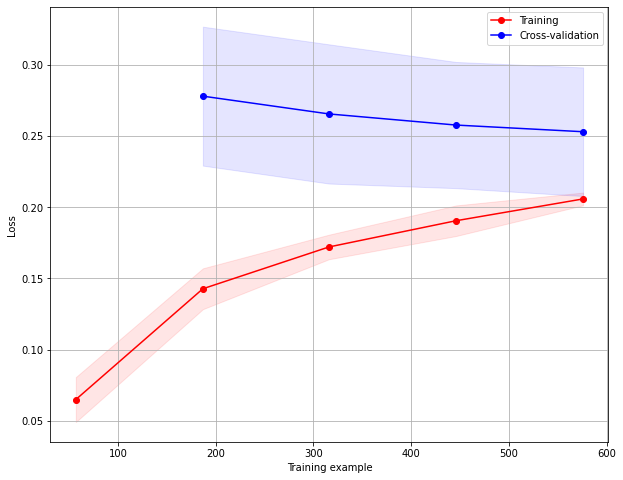

In [40]:
fig, ax = plt.subplots(figsize=(10,8))

train_sizes, train_loss, test_loss = learning_curve(pipe_LR,
                                                   X_train,
                                                   y_train_cv,
                                                   cv=10,
                                                   scoring='neg_mean_squared_error')
#Loss is normally negative.
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)
train_loss_std = np.std(train_loss, axis=1)
test_loss_std = np.std(test_loss, axis=1)
#Display
plt.plot(train_sizes, train_loss_mean, 'o-', color='r', label='Training')
plt.plot(train_sizes, test_loss_mean, 'o-', color='b', label='Cross-validation')

plt.grid('on')

plt.fill_between(train_sizes, train_loss_mean - train_loss_std,
                 train_loss_mean + train_loss_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_loss_mean - test_loss_std,
                 test_loss_mean + test_loss_std, alpha=0.1, color="b")

plt.xlabel('Training example')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [41]:
y_cv = y.copy().replace({
    'bad': 0,
    'good': 1
})

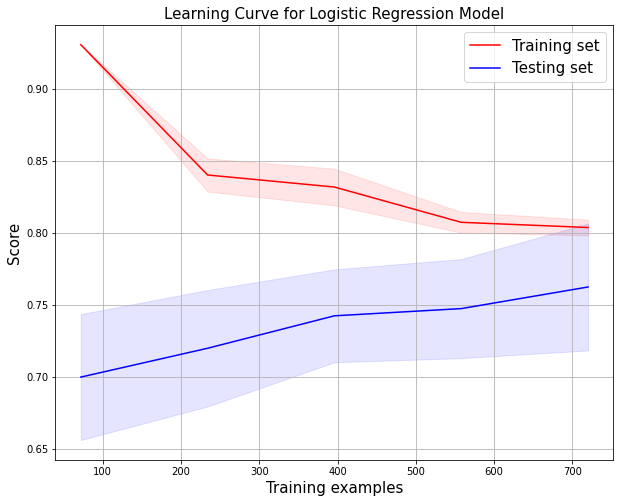

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(pipe_LR, 
                                                                      X, 
                                                                      y_cv, 
                                                                      cv=10,
                                                                      return_times=True)
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.grid('on')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="b")

plt.plot(train_sizes, train_scores_mean, label='Training set', color='r')
plt.plot(train_sizes, test_scores_mean, label='Testing set', color='b')

plt.xlabel('Training examples', fontsize=15)
plt.ylabel('Score', fontsize=15)

plt.title('Learning Curve for Logistic Regression Model', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=15)
plt.show()


So this model is not overfitting or underfitting.

## 3.2 Decision Tree

### 3.2.1 Pipeline Merge and prediction

In [43]:
pipe_DT = Pipeline([('preprocessing', ct),
                   ('model', DecisionTreeClassifier(random_state=42))])
pipe_DT.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num', StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('out',
                                                                   FunctionTransformer(func=<function cat_imputer at 0x7f8eca026f70>)),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [44]:
pred_DT_ROC = pipe_DT.predict(X_test)
prob_DT_ROC = pipe_DT.predict_proba(X_test)

### 3.2.2 Model evaluation

In [45]:
score_dt = cross_val_score(pipe_DT,
                          X_train,
                          y_train_cv,
                          cv=5,
                          scoring='f1')


In [46]:
print("Decision Tree - The mean f1-score on the 5 validation folds is: {0}% +/- {1}%".format(round(np.mean(score_dt) * 100, 2), round(np.std(score_dt) * 100, 2)))

Decision Tree - The mean f1-score on the 5 validation folds is: 77.0% +/- 1.36%


## 3.3 SVM

### 3.3.1 Pipeline Merge

In [47]:
pipe_SVM = Pipeline([('preprocessing', ct),
                   ('model', SVC(random_state=42, probability=True))])

pipe_SVM.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num', StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('out',
                                                                   FunctionTransformer(func=<function cat_imputer at 0x7f8eca026f70>)),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object'))])),
                ('model', SVC(probability=True, random_state=42))])

In [48]:
pred_SVM_ROC = pipe_SVM.predict(X_test)
prob_SVM_ROC = pipe_SVM.predict_proba(X_test)

### 3.2.2 Model evaluation

In [49]:
score_svm = cross_val_score(pipe_SVM,
                          X_train,
                          y_train_cv,
                          cv=5,
                          scoring='f1')



In [50]:
print("Support Vector Machine - The mean f1-score on the 5 validation folds is: {0}% +/- {1}%".format(round(np.mean(score_svm) * 100, 2), round(np.std(score_svm) * 100, 2)))

Support Vector Machine - The mean f1-score on the 5 validation folds is: 84.3% +/- 1.4%


## 3.4 K-neighborsClassifier

### 3.4.1 Pipeline Merge

In [51]:
pipe_KNC = Pipeline([('preprocessing', ct),
                   ('model', KNeighborsClassifier())])

pipe_KNC.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num', StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('out',
                                                                   FunctionTransformer(func=<function cat_imputer at 0x7f8eca026f70>)),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object'))])),
                ('model', KNeighborsClassifier())])

In [52]:
pred_KNC_ROC = pipe_KNC.predict(X_test)
prob_KNC_ROC = pipe_KNC.predict_proba(X_test)

### 3.4.2 Model evaluation

In [53]:
score_knc = cross_val_score(pipe_KNC,
                          X_train,
                          y_train_cv,
                          cv=5,
                          scoring='f1')

In [54]:
print("K-neighborsClassifier - The mean f1-score on the 5 validation folds is: {0}% +/- {1}%".format(round(np.mean(score_knc) * 100, 2), round(np.std(score_knc) * 100, 2)))

K-neighborsClassifier - The mean f1-score on the 5 validation folds is: 83.26% +/- 1.75%


## 3.5 Models Comparison

### 3.5.1 Model cross validation scores comparison

In [55]:
print("Logistic Regression - The mean f1-score on the 5 validation folds is: {0}% +/- {1}%".format(round(np.mean(score_lr) * 100, 2), round(np.std(score_lr) * 100, 2)))
print("Decision Tree - The mean f1-score on the 5 validation folds is: {0}% +/- {1}%".format(round(np.mean(score_dt) * 100, 2), round(np.std(score_dt) * 100, 2)))
print("Support Vector Machine - The mean f1-score on the 5 validation folds is: {0}% +/- {1}%".format(round(np.mean(score_svm) * 100, 2), round(np.std(score_svm) * 100, 2)))
print("K-neighborsClassifier - The mean f1-score on the 5 validation folds is: {0}% +/- {1}%".format(round(np.mean(score_knc) * 100, 2), round(np.std(score_knc) * 100, 2)))

Logistic Regression - The mean f1-score on the 5 validation folds is: 82.14% +/- 0.87%
Decision Tree - The mean f1-score on the 5 validation folds is: 77.0% +/- 1.36%
Support Vector Machine - The mean f1-score on the 5 validation folds is: 84.3% +/- 1.4%
K-neighborsClassifier - The mean f1-score on the 5 validation folds is: 83.26% +/- 1.75%


<font color='blue'>We can find out that <b>SVM model</b> works the best on the dataset.</font>

### 3.5.2 Model learning curves display

In [56]:
#Function of calculating values.
def learning_curve_values(pipe):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(pipe, 
                                                                      X, 
                                                                      y_cv, 
                                                                      cv=10,
                                                                      return_times=True)
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)
    
    return train_scores_mean, train_scores_std, test_scores_mean, test_scores_std
        

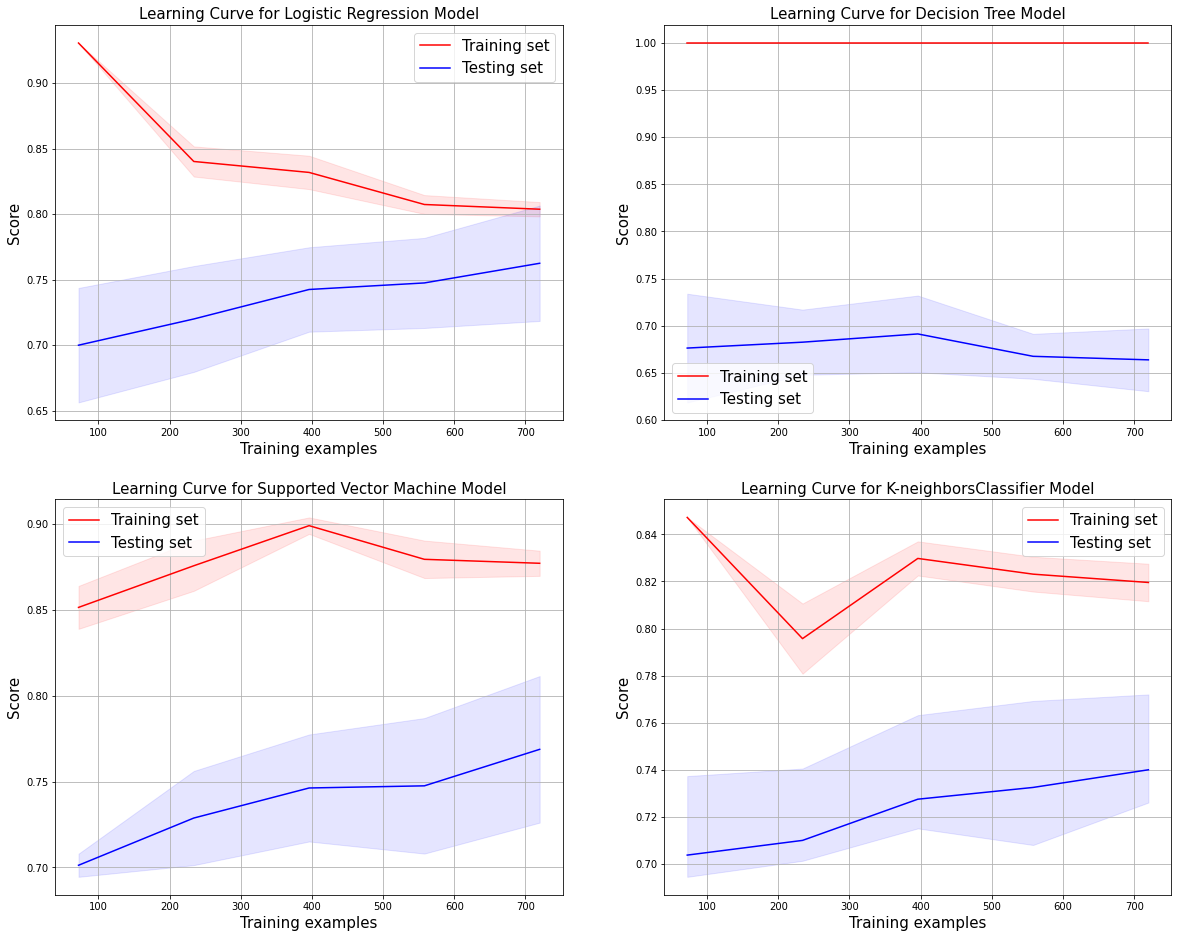

In [57]:
#Graphing
plt.figure(figsize=(20, 16))


#LG:
plt.subplot(221)
train_scores_mean_LG, train_scores_std_LG, test_scores_mean_LG, test_scores_std_LG = learning_curve_values(pipe_LR)

plt.grid('on')

plt.fill_between(train_sizes, train_scores_mean_LG - train_scores_std_LG,
                 train_scores_mean_LG + train_scores_std_LG, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean_LG - test_scores_std_LG,
                 test_scores_mean_LG + test_scores_std_LG, alpha=0.1, color="b")

plt.plot(train_sizes, train_scores_mean_LG, label='Training set', color='r')
plt.plot(train_sizes, test_scores_mean_LG, label='Testing set', color='b')

plt.xlabel('Training examples', fontsize=15)
plt.ylabel('Score', fontsize=15)

plt.title('Learning Curve for Logistic Regression Model', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=15)

#DT:
plt.subplot(222)
train_scores_mean_DT, train_scores_std_DT, test_scores_mean_DT, test_scores_std_DT = learning_curve_values(pipe_DT)
plt.grid('on')

plt.fill_between(train_sizes, train_scores_mean_DT - train_scores_std_DT,
                 train_scores_mean_DT + train_scores_std_DT, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean_DT - test_scores_std_DT,
                 test_scores_mean_DT + test_scores_std_DT, alpha=0.1, color="b")

plt.plot(train_sizes, train_scores_mean_DT, label='Training set', color='r')
plt.plot(train_sizes, test_scores_mean_DT, label='Testing set', color='b')

plt.xlabel('Training examples', fontsize=15)
plt.ylabel('Score', fontsize=15)

plt.title('Learning Curve for Decision Tree Model', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=15)

#SVM:
plt.subplot(223)
train_scores_mean_SVM, train_scores_std_SVM, test_scores_mean_SVM, test_scores_std_SVM = learning_curve_values(pipe_SVM)
plt.grid('on')

plt.fill_between(train_sizes, train_scores_mean_SVM - train_scores_std_SVM,
                 train_scores_mean_SVM + train_scores_std_SVM, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean_SVM - test_scores_std_SVM,
                 test_scores_mean_SVM + test_scores_std_SVM, alpha=0.1, color="b")

plt.plot(train_sizes, train_scores_mean_SVM, label='Training set', color='r')
plt.plot(train_sizes, test_scores_mean_SVM, label='Testing set', color='b')

plt.xlabel('Training examples', fontsize=15)
plt.ylabel('Score', fontsize=15)

plt.title('Learning Curve for Supported Vector Machine Model', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=15)

#KNN:
plt.subplot(224)
train_scores_mean_KNN, train_scores_std_KNN, test_scores_mean_KNN, test_scores_std_KNN = learning_curve_values(pipe_KNC)
plt.grid('on')

plt.fill_between(train_sizes, train_scores_mean_KNN - train_scores_std_KNN,
                 train_scores_mean_KNN + train_scores_std_KNN, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean_SVM - test_scores_std_SVM,
                 test_scores_mean_KNN + test_scores_std_KNN, alpha=0.1, color="b")

plt.plot(train_sizes, train_scores_mean_KNN, label='Training set', color='r')
plt.plot(train_sizes, test_scores_mean_KNN, label='Testing set', color='b')

plt.xlabel('Training examples', fontsize=15)
plt.ylabel('Score', fontsize=15)

plt.title('Learning Curve for K-neighborsClassifier Model', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=15)

plt.show()

As we can see from the result of these graphes, decision tree is obviously overfitting while the other models fits well, but they also have some possibilities to be improved.

### 3.5.3 Compute the AUC scores and display the ROC curves for each model

In [58]:
y_test_use = y_test.replace({
    'good': 1,
    'bad':0
})

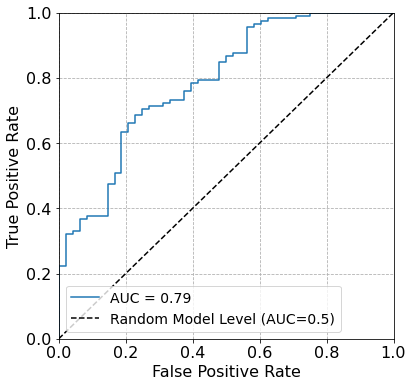

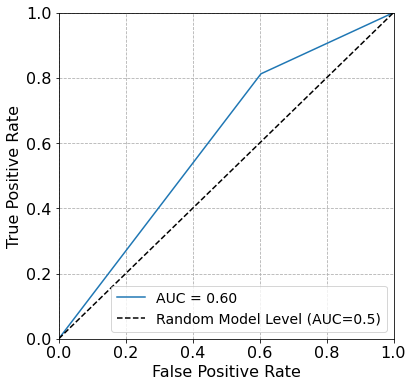

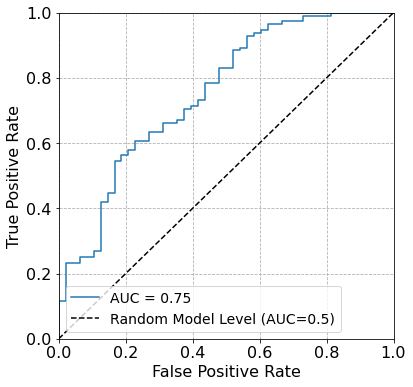

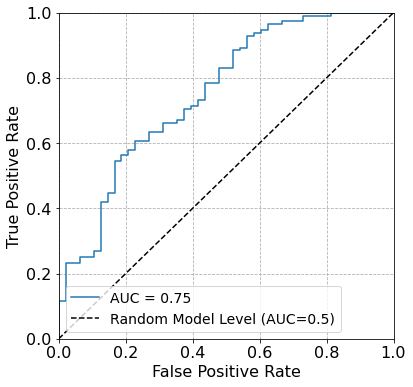

In [59]:
fig, ax = plt.subplots(figsize=(6, 6))

fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test_use, prob_LG_ROC[:,1])
roc_auc1 = roc_auc_score(y_test_use, prob_LG_ROC[:,1])
disp1 = RocCurveDisplay(fpr=fpr_LR,
                       tpr=tpr_LR,
                       roc_auc=roc_auc1)
disp1.plot(ax=ax)
ax.plot([0,1], [0,1],'k--', label='Random Model Level (AUC=0.5)')
ax.grid(linestyle='--')
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.tick_params(labelsize=16)
ax.set_ylim([0,1])
ax.set_xlim([0,1])

plt.legend(fontsize=14)


fig, ax = plt.subplots(figsize=(6, 6))

fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test_use, prob_DT_ROC[:,1])
roc_auc2 = roc_auc_score(y_test_use, prob_DT_ROC[:,1])
disp2 = RocCurveDisplay(fpr=fpr_DT,
                       tpr=tpr_DT,
                       roc_auc=roc_auc2)
disp2.plot(ax=ax)
ax.plot([0,1], [0,1],'k--', label='Random Model Level (AUC=0.5)')
ax.grid(linestyle='--')
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.tick_params(labelsize=16)
ax.set_ylim([0,1])
ax.set_xlim([0,1])

plt.legend(fontsize=14)

fig, ax = plt.subplots(figsize=(6, 6))

fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test_use, prob_SVM_ROC[:,1])
roc_auc3 = roc_auc_score(y_test_use, prob_SVM_ROC[:,1])
disp3 = RocCurveDisplay(fpr=fpr_SVM,
                       tpr=tpr_SVM,
                       roc_auc=roc_auc3)
disp3.plot(ax=ax)
ax.plot([0,1], [0,1],'k--', label='Random Model Level (AUC=0.5)')
ax.grid(linestyle='--')
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.tick_params(labelsize=16)
ax.set_ylim([0,1])
ax.set_xlim([0,1])

plt.legend(fontsize=14)


fig, ax = plt.subplots(figsize=(6, 6))

fpr_KNC, tpr_KNC, thresholds_KNC = roc_curve(y_test_use, prob_KNC_ROC[:,1])
roc_auc4 = roc_auc_score(y_test_use, prob_KNC_ROC[:,1])
disp4 = RocCurveDisplay(fpr=fpr_KNC,
                       tpr=tpr_KNC,
                       roc_auc=roc_auc4)
disp3.plot(ax=ax)
ax.plot([0,1], [0,1],'k--', label='Random Model Level (AUC=0.5)')
ax.grid(linestyle='--')
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.tick_params(labelsize=16)
ax.set_ylim([0,1])
ax.set_xlim([0,1])

plt.legend(fontsize=14)
plt.show()

# 4. Hyperparameter Tuning
In this part, we will try to modify some parameters of the models to optimize the performance of them.

Firstly, we do research on decision tree model.

## 4.1 Decision Tree

### 4.1.1 Grid Search

#### 4.1.1 - 1 Parameter research

In [60]:
# Criterion does not make the model vary a lot
for criterion in ['gini', 'entropy']:
    dtc = DecisionTreeClassifier(criterion=criterion,
                                random_state=42)
    pipe = Pipeline([('preprocessing', StandardScaler()),
                    ('model', dtc)])
    
    score = cross_val_score(pipe, 
                            X_train_use, 
                            y_train, 
                            cv=5, 
                            scoring=f1_scorer)

    print(f"{criterion} --> Mean score : {np.mean(score):.4f} +/- {np.std(score):.4f}")

gini --> Mean score : 0.6828 +/- 0.0175
entropy --> Mean score : 0.6703 +/- 0.0337


In [61]:
# Splitter does not make the model vary a lot
for splitter in ['best', 'random']:
    dtc = DecisionTreeClassifier(splitter=splitter,
                                random_state=42)
    pipe = Pipeline([('preprocessing', StandardScaler()),
                    ('model', dtc)])
    score = cross_val_score(pipe, 
                            X_train_use, 
                            y_train, 
                            cv=5, 
                            scoring=f1_scorer)

    print(f"{splitter} --> Mean score : {np.mean(score):.4f} +/- {np.std(score):.4f}")

best --> Mean score : 0.6828 +/- 0.0175
random --> Mean score : 0.6687 +/- 0.0421


In [62]:
# max_depth seems very important
for max_depth in [2, None]:                                   # 2 and None are the most extreme values
    dtc = DecisionTreeClassifier(max_depth=max_depth,
                                 random_state=42)
    pipe = Pipeline([('preprocessing', StandardScaler()),
                    ('model', dtc)])

    score = cross_val_score(pipe, 
                            X_train_use, 
                            y_train, 
                            cv=5, 
                            scoring=f1_scorer)

    print(f"{max_depth} --> Mean score : {np.mean(score):.4f} +/- {np.std(score):.4f}")

2 --> Mean score : 0.6953 +/- 0.0204
None --> Mean score : 0.6828 +/- 0.0175


In [63]:
# min_samples_split seems very important
for min_samples_split in [2, 100]:                                   
    dtc = DecisionTreeClassifier(min_samples_split=min_samples_split,
                                 random_state=42)
    pipe = Pipeline([('preprocessing', StandardScaler()),
                    ('model', dtc)])

    score = cross_val_score(pipe, 
                            X_train_use, 
                            y_train, 
                            cv=5, 
                            scoring=f1_scorer)

    print(f"{min_samples_split} --> Mean score : {np.mean(score):.4f} +/- {np.std(score):.4f}")

2 --> Mean score : 0.6828 +/- 0.0175
100 --> Mean score : 0.6531 +/- 0.0201


In [64]:
# min_samples_leaf seems very important
for min_samples_leaf in [1, 100]:                                   
    dtc = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf,
                                 random_state=42)
    pipe = Pipeline([('preprocessing', StandardScaler()),
                    ('model', dtc)])

    score = cross_val_score(pipe, 
                            X_train_use, 
                            y_train, 
                            cv=5, 
                            scoring=f1_scorer)

    print(f"{min_samples_leaf} --> Mean score : {np.mean(score):.4f} +/- {np.std(score):.4f}")

1 --> Mean score : 0.6828 +/- 0.0175
100 --> Mean score : 0.7125 +/- 0.0181


In [65]:
# max_features seems to very little effect on the performances
for max_features in [1, 6]:                                   
    dtc = DecisionTreeClassifier(max_features=max_features,
                                 random_state=42)
    pipe = Pipeline([('preprocessing', StandardScaler()),
                    ('model', dtc)])

    score = cross_val_score(pipe, 
                            X_train_use, 
                            y_train, 
                            cv=5, 
                            scoring=f1_scorer)

    print(f"{max_features} --> Mean score : {np.mean(score):.4f} +/- {np.std(score):.4f}")

1 --> Mean score : 0.6516 +/- 0.0273
6 --> Mean score : 0.6656 +/- 0.0364


We can see that, <b>min_samples_leaf</b> and <b>max_depth</b> are relatively important among all the parameters.

#### 4.1.1 - 2 Grid Search

In [66]:
params = {"model__criterion": ["gini", "entropy"], 
          "model__splitter": ["random", "best"],
          "model__max_depth": [None, 5, 10, 15, 20], 
          "model__min_samples_split": [2, 5, 10, 15, 20], 
          "model__max_features": [2, 3, 4, 5, 6]}

Use a Grid Search strategy to find the best hyperparameter using the param_grid defined at the previous question.

In [67]:
# t0 = time()
# gscv = GridSearchCV(pipe_DT,
#                     cv=5, 
#                     param_grid=params,
#                     scoring=f1_scorer)

# gscv.fit(X_train, y_train)
# print(f"The grid search took {time() - t0:.0f}s to run")

In [68]:
# res_gs = pd.DataFrame(gscv.cv_results_)
# res_gs.head()

Evaluate the best hyperparameters.

In [69]:
# res_gs.loc[:,'params':].sort_values('rank_test_score').head()

In [70]:
# res_gs.loc[:,'params':].sort_values('rank_test_score')['params'].head().to_numpy()

### 4.1.2 Random Research

In [71]:
max_depth = list(range(5,80,5))
max_depth.append(None)

params = {"model__criterion": ["gini", "entropy"], 
          "model__splitter": ["random", "best"],
          "model__max_depth": max_depth, 
          "model__min_samples_split": range(2,30,2), 
          "model__min_samples_leaf": range(1,30,2), 
          "model__max_features": range(1,7)}

In [72]:
rscv = RandomizedSearchCV(pipe_DT, 
                          params,
                          n_iter=500, 
                          scoring=f1_scorer, 
                          cv=5,
                          random_state=42)

rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(sparse_threshold=0,
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['duration',
                                                                                'credit_amount',
                                                                                'installment_commitment',
                                                                                'residence_since',
                                                                                'age',
                                                                                'existing_credits',
                                                                                'num_dependents']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('out',
                                                                                                FunctionTransformer(func=<function cat_imputer at 0x7f8eca026f70>)...
                   n_iter=500,
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': [5, 10, 15, 20, 25,
                                                             30, 35, 40, 45, 50,
                                                             55, 60, 65, 70, 75,
                                                             None],
                                        'model__max_features': range(1, 7),
                                        'model__min_samples_leaf': range(1, 30, 2),
                                        'model__min_samples_split': range(2, 30, 2),
                                        'model__splitter': ['random', 'best']},
                   random_state=42,
                   scoring=make_scorer(f1_score, average=micro))

In [73]:
results = pd.DataFrame(rscv.cv_results_).loc[:,'params':].sort_values('rank_test_score')
results.head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
130,"{'model__splitter': 'best', 'model__min_sample...",0.757812,0.695312,0.781250,0.742188,0.742188,0.743750,0.028125,1
267,"{'model__splitter': 'random', 'model__min_samp...",0.750000,0.742188,0.757812,0.703125,0.718750,0.734375,0.020373,2
13,"{'model__splitter': 'best', 'model__min_sample...",0.718750,0.726562,0.804688,0.679688,0.726562,0.731250,0.040625,3
102,"{'model__splitter': 'best', 'model__min_sample...",0.718750,0.726562,0.804688,0.679688,0.726562,0.731250,0.040625,3
217,"{'model__splitter': 'best', 'model__min_sample...",0.718750,0.726562,0.804688,0.679688,0.726562,0.731250,0.040625,3


In [74]:
results.iloc[:10]['params'].to_numpy()

array([{'model__splitter': 'best', 'model__min_samples_split': 26, 'model__min_samples_leaf': 9, 'model__max_features': 6, 'model__max_depth': 5, 'model__criterion': 'entropy'},
       {'model__splitter': 'random', 'model__min_samples_split': 22, 'model__min_samples_leaf': 5, 'model__max_features': 3, 'model__max_depth': 10, 'model__criterion': 'gini'},
       {'model__splitter': 'best', 'model__min_samples_split': 12, 'model__min_samples_leaf': 7, 'model__max_features': 5, 'model__max_depth': 40, 'model__criterion': 'entropy'},
       {'model__splitter': 'best', 'model__min_samples_split': 10, 'model__min_samples_leaf': 7, 'model__max_features': 5, 'model__max_depth': 75, 'model__criterion': 'entropy'},
       {'model__splitter': 'best', 'model__min_samples_split': 8, 'model__min_samples_leaf': 7, 'model__max_features': 5, 'model__max_depth': 75, 'model__criterion': 'entropy'},
       {'model__splitter': 'random', 'model__min_samples_split': 22, 'model__min_samples_leaf': 1, 'model__m

We can get that:
<li>Model_splitter seems to be the best parameter with <b>'best'</b>;</li>
<li>Model_min_samples_leaf is better with around <b>4</b>;</li>
<li>Model_max_features is better with around <b>5</b>;</li>
<li>Model__max_depth is better to have a value less than <b>40</b>;</li>
<li>Model__min_samples_split is better to have a value less than <b>22</b>.</li>

In [75]:
max_depth = list(range(20,35))
max_depth.append(None)

params = {"model__criterion": ["gini", "entropy"],
          "model__max_depth": max_depth, 
          "model__min_samples_split": range(2,8), 
          "model__min_samples_leaf": range(1,5), 
          "model__max_features": range(4,7)}

rscv = RandomizedSearchCV(pipe_DT, 
                          params, 
                          n_iter=250,
                          scoring=f1_scorer, 
                          cv=5,
                          random_state=42)

rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(sparse_threshold=0,
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['duration',
                                                                                'credit_amount',
                                                                                'installment_commitment',
                                                                                'residence_since',
                                                                                'age',
                                                                                'existing_credits',
                                                                                'num_dependents']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('out',
                                                                                                FunctionTransformer(func=<function cat_imputer at 0x7f8eca026f70>)...
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=250,
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': [20, 21, 22, 23, 24,
                                                             25, 26, 27, 28, 29,
                                                             30, 31, 32, 33, 34,
                                                             None],
                                        'model__max_features': range(4, 7),
                                        'model__min_samples_leaf': range(1, 5),
                                        'model__min_samples_split': range(2, 8)},
                   random_state=42,
                   scoring=make_scorer(f1_score, average=micro))

In [76]:
results = pd.DataFrame(rscv.cv_results_).loc[:,'params':].sort_values('rank_test_score')
results.head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
173,"{'model__min_samples_split': 3, 'model__min_sa...",0.75,0.703125,0.710938,0.648438,0.6875,0.7,0.032998,1
209,"{'model__min_samples_split': 5, 'model__min_sa...",0.75,0.703125,0.710938,0.648438,0.6875,0.7,0.032998,1
227,"{'model__min_samples_split': 2, 'model__min_sa...",0.75,0.703125,0.710938,0.648438,0.6875,0.7,0.032998,1
172,"{'model__min_samples_split': 5, 'model__min_sa...",0.75,0.703125,0.710938,0.648438,0.6875,0.7,0.032998,1
139,"{'model__min_samples_split': 3, 'model__min_sa...",0.75,0.703125,0.710938,0.648438,0.6875,0.7,0.032998,1


In [77]:
results.iloc[:5]['params'].to_numpy()

array([{'model__min_samples_split': 3, 'model__min_samples_leaf': 3, 'model__max_features': 4, 'model__max_depth': 22, 'model__criterion': 'gini'},
       {'model__min_samples_split': 5, 'model__min_samples_leaf': 3, 'model__max_features': 4, 'model__max_depth': 34, 'model__criterion': 'gini'},
       {'model__min_samples_split': 2, 'model__min_samples_leaf': 3, 'model__max_features': 4, 'model__max_depth': 21, 'model__criterion': 'gini'},
       {'model__min_samples_split': 5, 'model__min_samples_leaf': 3, 'model__max_features': 4, 'model__max_depth': 31, 'model__criterion': 'gini'},
       {'model__min_samples_split': 3, 'model__min_samples_leaf': 3, 'model__max_features': 4, 'model__max_depth': 23, 'model__criterion': 'gini'}],
      dtype=object)

In [78]:
rscv.best_params_

{'model__min_samples_split': 3,
 'model__min_samples_leaf': 3,
 'model__max_features': 4,
 'model__max_depth': 23,
 'model__criterion': 'gini'}

In [79]:
dtc = DecisionTreeClassifier(criterion = "gini",
                             splitter = "best",
                             min_samples_split = 3,
                             min_samples_leaf = 3,
                             max_features = 4,
                             max_depth = 23,
                             random_state = 42)
pipe_DT =Pipeline([('preprocessing', ct),
                  ('model', dtc)])
                  

pipe_DT.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num', StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('out',
                                                                   FunctionTransformer(func=<function cat_imputer at 0x7f8eca026f70>)),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(max_depth=23, max_features=4,
                                        min_samples_leaf=3, min_samples_split=3,
                                        random_state=42))])

### 4.1.3 New model evaluation

In [80]:
pipe_DT.predict(X_train)[:5]

array(['bad', 'good', 'good', 'good', 'bad'], dtype=object)

In [81]:
y_pred = pipe_DT.predict(X_test)

print('Results of optimized Decision Tree model:', end="\n\n")
print('F1_score of the model works on training set:{0}%'.format(round(f1_score(y_train, pipe_DT.predict(X_train), pos_label="good") * 100, 2)), end='\n')
print('Accuracy score of the model works on training set:{0}%'.format(round(accuracy_score(y_train, pipe_DT.predict(X_train)) * 100, 2)), end='\n')
print('F1_score of the model works on testing set:{0}%'.format(round(f1_score(y_test, y_pred, pos_label="good") * 100, 2)))
print('Accuracy score of the model works on testing set:{0}%'.format(round(accuracy_score(y_test, pipe_DT.predict(X_test)) * 100, 2)), end='\n')


Results of optimized Decision Tree model:

F1_score of the model works on training set:87.27%
Accuracy score of the model works on training set:81.72%
F1_score of the model works on testing set:85.12%
Accuracy score of the model works on testing set:77.5%


## 4.2 Logistic Regression

### 4.2.1 Random Research

In [82]:
#Define parameters:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [83]:
#Define grid Search
params = dict(solver=solvers, penalty=penalty, C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=params, scoring=f1_scorer, cv=5)
grid_result = grid_search.fit(X_train_use, y_train)

/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
#Summerize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.746875 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.746875 (0.022964) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.746875 (0.022964) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.746875 (0.022964) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.745313 (0.024004) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.745313 (0.024004) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.745313 (0.024004) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.740625 (0.011482) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.740625 (0.011482) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.742188 (0.009882) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.745313 (0.021310) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.745313 (0.021310) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.745313 (0.024004) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.715625 (0.016829) wit

So we can find out the best parameters for Logistic Regression:
<li>'C': 100</li>
<li>'penalty': 'l2'</li>
<li>'solver': 'newton-cg'</li>

In [85]:
model_lr = LogisticRegression(C=100, 
                              penalty='l2', 
                              solver='newton-cg')
pipe_LR = Pipeline([
    ('preprocessing', ct),
    ('model', model_lr)
])

pipe_LR.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num', StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('out',
                                                                   FunctionTransformer(func=<function cat_imputer at 0x7f8eca026f70>)),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object'))])),
                ('model', LogisticRegression(C=100, solver='newton-cg'))])

### 4.2.2 New model evaluation

In [86]:
pipe_LR.predict(X_test)[:5]


array(['good', 'good', 'good', 'good', 'bad'], dtype=object)

In [87]:
y_pred_LR = pipe_LR.predict(X_test)

print('Results of optimized Decision Tree model:', end="\n\n")
print('F1_score of the model works on training set:{0}%'.format(round(f1_score(y_train, pipe_LR.predict(X_train), pos_label="good") * 100, 2)), end='\n')
print('Accuracy score of the model works on training set:{0}%'.format(round(accuracy_score(y_train, pipe_LR.predict(X_train)) * 100, 2)), end='\n')
print('F1_score of the model works on testing set:{0}%'.format(round(f1_score(y_test, y_pred_LR, pos_label="good") * 100, 2)))
print('Accuracy score of the model works on testing set:{0}%'.format(round(accuracy_score(y_test, y_pred_LR) * 100, 2)), end='\n')


Results of optimized Decision Tree model:

F1_score of the model works on training set:85.78%
Accuracy score of the model works on training set:79.38%
F1_score of the model works on testing set:84.65%
Accuracy score of the model works on testing set:76.88%


# 5. Predict on "credit_test" dataset
Improved models comparison:
1. Results of optimized Decision Tree model:

F1_score of the model works on training set:<b>87.27%</b> <br/>
Accuracy score of the model works on training set:<b>81.72%</b> <br/>
F1_score of the model works on testing set:<b>85.12%</b> <br/>
Accuracy score of the model works on testing set<b>:77.5%</b> <br/>

2. Results of optimized Decision Tree model:

F1_score of the model works on training set<b>:85.78%</b> <br/>
Accuracy score of the model works on training set:<b>79.38%</b> <br/>
F1_score of the model works on testing set:<b>84.65%</b> <br/>
Accuracy score of the model works on testing set:<b>76.88%</b> <br/>


After comparing the two enhanced models showed before, we decide to use decision tree to predict the target of credit_test dataset.

In [88]:
df_test = pd.read_csv('credit_test.csv')
df_test.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0<=X<200,18,delayed previously,business,2427,no known savings,>=7,4,male single,none,2,life insurance,42,none,own,2,skilled,1,none,yes
1,0<=X<200,36,all paid,domestic appliance,3990,no known savings,<1,3,female div/dep/mar,none,2,no known property,29,bank,own,1,unemp/unskilled non res,1,none,yes
2,0<=X<200,48,no credits/all paid,business,12204,no known savings,1<=X<4,2,male single,none,2,car,48,bank,own,1,high qualif/self emp/mgmt,1,yes,yes
3,no checking,10,existing paid,new car,1597,500<=X<1000,1<=X<4,3,male single,none,2,no known property,40,none,rent,1,unskilled resident,2,none,no
4,0<=X<200,36,existing paid,new car,12389,no known savings,1<=X<4,1,male single,none,4,no known property,37,none,for free,1,skilled,1,yes,yes


In [89]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         200 non-null    object
 1   duration                200 non-null    int64 
 2   credit_history          200 non-null    object
 3   purpose                 200 non-null    object
 4   credit_amount           200 non-null    int64 
 5   savings_status          200 non-null    object
 6   employment              200 non-null    object
 7   installment_commitment  200 non-null    int64 
 8   personal_status         200 non-null    object
 9   other_parties           200 non-null    object
 10  residence_since         200 non-null    int64 
 11  property_magnitude      200 non-null    object
 12  age                     200 non-null    int64 
 13  other_payment_plans     200 non-null    object
 14  housing                 200 non-null    object
 15  existi

In [90]:
df_test_use = ct.fit_transform(df_test)
col_names = np.concatenate([num_col, ct.named_transformers_.cat.named_steps.ohe.get_feature_names_out()], axis=0)
df_test_use = pd.DataFrame(df_test_use, columns=col_names)
df_test_use

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,-0.274753,-0.395791,0.973521,-0.798352,0.512617,0.995994,-0.369274,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.268321,0.125845,0.100408,-0.798352,-0.633388,-0.650277,-0.369274,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2.297036,2.867190,-0.772705,-0.798352,1.041542,-0.650277,-0.369274,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.960563,-0.672796,0.100408,-0.798352,0.336308,-0.650277,2.708013,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.268321,2.928932,-1.645818,1.058281,0.071846,-0.650277,-0.369274,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.531932,-0.295335,0.973521,-0.798352,-0.104463,2.642266,-0.369274,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
196,-0.103300,-0.328376,-0.772705,0.129964,-0.633388,0.995994,-0.369274,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
197,0.239605,1.383379,-0.772705,1.058281,-0.633388,-0.650277,-0.369274,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
198,-1.132016,-0.071729,-1.645818,1.058281,0.248154,0.995994,-0.369274,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [91]:
df_test_pred = pipe_DT.predict(df_test)

In [92]:
df_test_pred.shape

(200,)

In [93]:
# Save these predictions to a file.
np.save('predictions.npy', df_test_pred)

In [94]:
#np.load('predictions.npy', encoding='ASCII', allow_pickle=True)